<a href="https://colab.research.google.com/github/wisrovi/RedesNeuronales/blob/master/07MAIR-WilliamSteveRodriguezVillamizar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Nota sobre notebook (leer antes de ejecutar otra linea)

## 0.0. 
Tanto para el ejercicio de crear la red neuronal desde cero como para la red neuronal con transferencia de conocimiento se aumento el dataseet de datos con ImageGenerator en cuatro (4) veces el tamaño original [No se pudo aumentar más veces debido a que el entorno de ejecución por mi GPU no lo permitió], esto para que los modelos entrenados tuvieran más generalización en los datos y con esto tuviera mejor respuesta en los test y predict

## 0.1.
Antes de efectuar cualquier carga del programa se debe iniciar el sistema ejecutando todos los codigos del apartado 2. Iniciar Sistema

## 0.2. 
Para evaluar la red Neuronal creada desde cero se puede ir al punto 3.3 Cargar Modelo Red Neuronal Guardado (Nueva red neuronal desde cero)

## 0.3.
Para evaluar el modelo por transferencia de conocimiento puede ir directamente al apartado 4.5. Cargar Modelo Red Neuronal Guardado (Transferencia conocimiento)

## 0.4.
El Base Folder se puede modificar en el apartado 2.2. Conexion con Google y Drive

# 1. Bibliografia

In [0]:
#urlArchivos = "https://drive.google.com/drive/folders/1w2w5dAF269C646RBwwU33YLNUG4JRfh9?usp=sharing"

In [0]:
#!pip install tensorflow==2.0.0-alpha0

In [0]:
#https://github.com/jbagnato/machine-learning
#https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python#cnn
#https://www.datacamp.com/community/blog/keras-cheat-sheet
#https://www.pyimagesearch.com/2018/12/24/how-to-use-keras-fit-and-fit_generator-a-hands-on-tutorial/
#https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/
#https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/
#https://www.aprendemachinelearning.com/clasificacion-de-imagenes-en-python/

# 2. Iniciar Sistema

## 2.1. Importar Librerias

In [4]:
#instalo las librerias necesarias
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU

#importo las librerias que se van a necesitar
import pickle
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from numpy import expand_dims

from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical #para que las salidas queden parametrizadas en binario

from sklearn.metrics import classification_report #para ver parametros 

from keras.applications.inception_v3 import decode_predictions #para ver varios items de prediccion

#para autoescalar la imagen al tamaño requerido por la red a reentrenar
from keras.applications.inception_v3 import preprocess_input

#Incrementar el número de ejemplos para evitar overfitting (junto con dropout)
#Generar datos a partir de los presentes, a través de transformaciones
from keras.preprocessing.image import ImageDataGenerator



# Para las librerias para la red neuronal
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#callback para mejorar los entrenamientos
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  

Using TensorFlow backend.


## 2.2. Conexion con Google y Drive

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
###################################################################################################
BASE_FOLDER = '/content/gdrive/My Drive/Master IA/Redes Neuronales/'
###################################################################################################

In [0]:
#le indicamos al colaboratory que las importaciones de librerias propias se haran tambien desde el directorio base
import sys
sys.path.append(BASE_FOLDER)

## 2.3 Importar Librerias propias

In [0]:
from ModeloExterno import ModeloExterno

## 2.4. Funciones

In [0]:
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def getRam_y_Gpu(imprimir=False):
  process = psutil.Process(os.getpid())
  ram_available = psutil.virtual_memory().available
  ram_disponible = humanize.naturalsize( ram_available  )
  gpu_disponible = gpu.memoryFree
  if imprimir:
      print("Gen RAM Free: " + ram_disponible, " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
      print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu_disponible, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
  ram_available = ram_available / 1000000000
  ram_available = round(ram_available, 2)
  return (ram_available, gpu_disponible)

#Algunas funciones utiles
def plot_image(img, title=""):
    #plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(title)
    #plt.axis('off')
    plt.show()

def convertLabelsToNumbers(y_train):
    # Transformando las labels de texto a valores numéricos
    y = np.unique(y_train)
    mapping = { key : value for key,value in zip(y,range(len(y)))}
    processed_y = np.array([mapping[i] for i in y_train])
    #print(len(mapping))
    return processed_y

def DividirDatos_Train_Test_Predic(x, y, porcentaje=0.25, randomDiv=50):
    print("Datos para división recibidos")

    # dividir los datos entre training, test y predic
    X_train, X_test, y_train, y_test = train_test_split(
        x_train_all, processed_y, 
        test_size=porcentaje, 
        random_state=randomDiv)
    print("División todo el dataset en: train y test completa")

    X_test, X_predic, y_test, y_predic = train_test_split(
        X_test, y_test, 
        test_size=porcentaje, 
        random_state=randomDiv)
    print("División dataset test en: test y predict completa")
    
    #Hacemos el One-hot Encoding
    train_Y_one_hot = to_categorical(y_train)
    test_Y_one_hot = to_categorical(y_test)
    predic_Y_one_hot = to_categorical(y_predic)
    print("Conversión de salidas en categorias completa")

    return (X_train, train_Y_one_hot), (X_test, test_Y_one_hot), (X_predic, predic_Y_one_hot)

def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['acc'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

def plot_pred(pred):
    plt.figure(figsize=(8, 2))
    classes = [c[1] for c in pred]
    probas = [c[2] for c in pred]
    y_pos = np.arange(len(classes))
    plt.barh(y_pos, probas, align='center')
    plt.yticks(y_pos, classes)
    plt.gca().invert_yaxis()
    plt.xlabel('Probability')
    plt.xlim(0, 1)

def DefineCallback(nameFileIfSave): #guardar el mejor modelo w.r.t en val_losses
    """
    Agradecimientos a Data Talks, 
    url: https://www.youtube.com/watch?v=Gl-N3xr5zLI
    """    
    #EarlyStopping, detener el entrenamiento una vez que su pérdida comienza a aumentar 
    early_stop = EarlyStopping(
        monitor='val_loss', 
        patience=5, #argumento de patience representa el número de épocas antes de detenerse una vez que su pérdida comienza a aumentar (deja de mejorar). 
        min_delta=0,  #es un umbral para cuantificar una pérdida en alguna época como mejora o no. Si la diferencia de pérdida es inferior a min_delta , se cuantifica como no mejora. Es mejor dejarlo como 0 ya que estamos interesados ​​en cuando la pérdida empeora.
        mode='auto')
        
    mcp_save = ModelCheckpoint(
        nameFileIfSave + 'model-{acc:03f}-{val_acc:03f}.h5', 
        monitor='val_loss',
        save_best_only=True, 
        mode='min')

    #ReduceLROnPlateau, que si el entrenamiento no mejora tras unos epochs específicos, reduce el valor de learning rate del modelo
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss', 
        factor=0.1, 
        patience=5, 
        epsilon=1e-4, 
        mode='min')
    
    callbacks_list = [early_stop, reduce_lr, mcp_save]  
    return callbacks_list

#hago las conversiones a la imagen
dataAumentationApliqued = False
def ConverImageUsingImageDataGenerator(datagen, imagen, nombre, cantidadConversiones):
    listaConversiones = []
    listaEtiquetasCadaConversion = []
    imagen4dimensiones = expand_dims(imagenConvertir, 0)
    imagen3dimensiones = np.squeeze(imagen4dimensiones)
    listaConversiones.append(convertNumpyToList(imagen3dimensiones))

    iterator_datagen_train = datagen.flow(imagen4dimensiones, batch_size=1)

    for i in range(cantidadConversiones):
        batch = iterator_datagen_train.next()
        image = np.squeeze(batch[0])
        listaConversiones.append(convertNumpyToList(image))

    for i in range(len(listaConversiones)):
        listaEtiquetasCadaConversion.append(nombreImagen)
    

    return listaConversiones, listaEtiquetasCadaConversion

def convertNumpyToList(imagenNumpy):
    return list(imagenNumpy)

def convertListoToNumpy(imagenList):
    return array(imagenList)

In [10]:
ramColab, GpuColab = getRam_y_Gpu(True)

Gen RAM Free: 26.1 GB  | Proc size: 367.4 MB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


## 2.5. Importar Dataseet y clases

In [11]:
#Cargo los archivos de clases y las imagenes
with open(BASE_FOLDER+"pickle_all_images_df-002.pickle", "rb") as input_file:
    x_train_all = pickle.load(input_file)
with open(BASE_FOLDER+"pickle_all_classes.pickle", "rb") as input_file:
    y_train_all = pickle.load(input_file)

number_of_classes = len(y_train_all)

print("Entradas: ",x_train_all.shape)
print("Salidas: ", number_of_classes)

Entradas:  (9145, 128, 128, 3)
Salidas:  9145


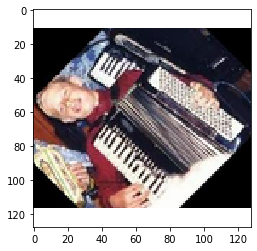

In [12]:
#show a image
plot_image(x_train_all[15])

## 2.6. Repartir Datos entre train-test-predic

In [13]:
print("Cantidad imagenes: ", len(x_train_all))
print("Cantidad etiquetas: ", len(y_train_all))

Cantidad imagenes:  9145
Cantidad etiquetas:  9145


In [14]:
processed_y = convertLabelsToNumbers(y_train_all)
salidasCategoricas = to_categorical(processed_y)

classesImageGenerator = np.unique(salidasCategoricas)
nClassesImageGenerator = len(salidasCategoricas[1])
print("Cantidad de categorias en las clases",nClassesImageGenerator)

Cantidad de categorias en las clases 102


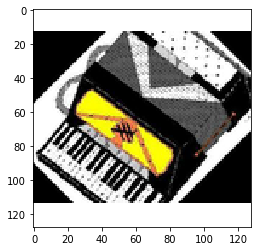

5 accordion


In [15]:
imagen = 7
plot_image(x_train_all[imagen])
print(processed_y[imagen], y_train_all[imagen])

In [16]:
classes = np.unique(processed_y)
nClasses = len(classes)

(X_train, y_train), (X_test, y_test), (X_predic, y_predic) = DividirDatos_Train_Test_Predic(x_train_all, processed_y)

print("Training (66.98%)") 
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print() 
print("Test (22.1%)") 
print("X_test", X_test.shape)
print("y_test", y_test.shape)
print()
print("Predict (10.89%)") 
print("X_predic", X_predic.shape)
print("y_predic", y_predic.shape)

print()
if y_predic.shape[1] == y_test.shape[1] and y_test.shape[1] == y_train.shape[1]:
    print("Distribución correcta")
else:
    print("Fallo en la distribución")

Datos para división recibidos
División todo el dataset en: train y test completa
División dataset test en: test y predict completa
Conversión de salidas en categorias completa
Training (66.98%)
X_train (6858, 128, 128, 3)
y_train (6858, 102)

Test (22.1%)
X_test (1715, 128, 128, 3)
y_test (1715, 102)

Predict (10.89%)
X_predic (572, 128, 128, 3)
y_predic (572, 102)

Distribución correcta


In [0]:
x_all = x_train_all
y_all = train_Y_one_hot = to_categorical(processed_y)

## 2.7. Aumentar el set de datos con DataGenerator (Opcional pero mejora los modelos cuando se utiliza)

### 2.7.1 Creando el modelo generador de datos

In [0]:
#Creamos el datagen del ImageDataGenerator para definir que cambios podria tener la imagen original

datagen = ImageDataGenerator(
    rotation_range=25, # grados de rotacion aleatoria
    width_shift_range=0.15, # fraccion del total (1) para mover la imagen
    height_shift_range=0.15, # fraccion del total (1) para mover la imagen
    shear_range=0.05, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

### 2.7.2.Aplicando el data aumentation en el dataset original

In [19]:
cantidadConversiones = 2
#probado y funcionando con valor de 4, pero se requiere una buena GPU
#porque es facil superar la RAM maxima, y cuando se supera el colab ya no funciona



#También se incluirá la imagen original (en la practica no se suele usar la imagen original, pero para tener un dataset más grande en esta oportunidad la incluiremos)


if dataAumentationApliqued == False:
    print("Cantidad imagenes iniciales: ", len(X_train))
    print("Cantidad etiquetas iniciales: ", len(y_train))
    print("Tipo datos iniciales: ", type(X_train))
    listadoImagenes = []
    listaEtiquetasImagen = []
    for imagenProcesar in range(len(X_train)):    
        imagenConvertir = X_train[imagenProcesar] #elijo la imagen a usar de todo el dataset
        nombreImagen = y_train[imagenProcesar]
        listaConversiones, listaEtiquetasCadaConversion = ConverImageUsingImageDataGenerator(datagen, imagenConvertir, nombreImagen, cantidadConversiones-1)
        #añado las conversiones a la lista con append
        for i in range(len(listaConversiones)):
            listadoImagenes.append(listaConversiones[i])
            listaEtiquetasImagen.append(listaEtiquetasCadaConversion[i])

    #convierto la lista nuevamente a numpy para entregarla a los modelos
    X_train = convertListoToNumpy(listadoImagenes)
    y_train = convertListoToNumpy(listaEtiquetasImagen)
    print()
    print("Cantidad imagenes finales: ", len(X_train))
    print("Cantidad etiquetas finales: ", len(y_train))
    print("Tipo datos finales: ", type(X_train))
    dataAumentationApliqued = True
else:
    print("No se puede aplicar dataAumentation varias veces, si desea usarlo nuevamente, vuelva a reiniciar el colab (disponible en el menú de 'Entorno de ejecución').")

Cantidad imagenes iniciales:  6858
Cantidad etiquetas iniciales:  6858
Tipo datos iniciales:  <class 'numpy.ndarray'>

Cantidad imagenes finales:  13716
Cantidad etiquetas finales:  13716
Tipo datos finales:  <class 'numpy.ndarray'>


In [20]:
ramColab, GpuColab = getRam_y_Gpu(False)
if ramColab < 4:
    print("La Ram disponible no es suficiente para los entrenamientos de la red neuronal.")
else:
    getRam_y_Gpu(True)

Gen RAM Free: 16.5 GB  | Proc size: 14.6 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


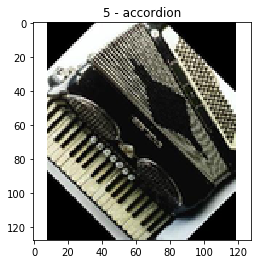

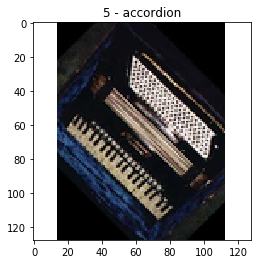

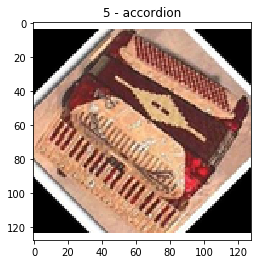

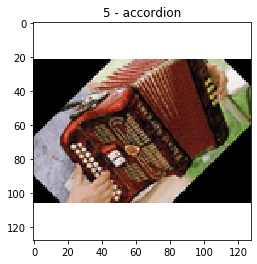

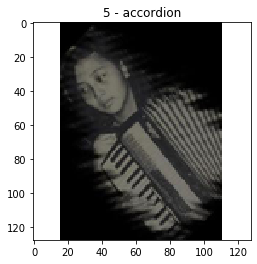

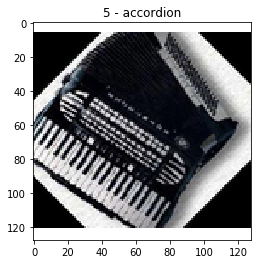

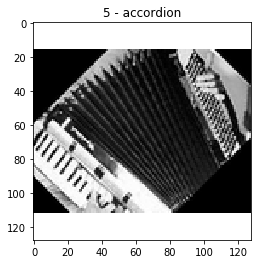

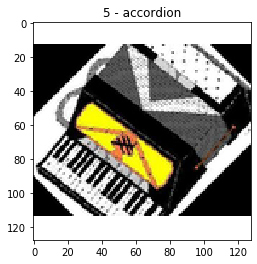

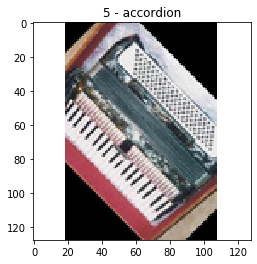

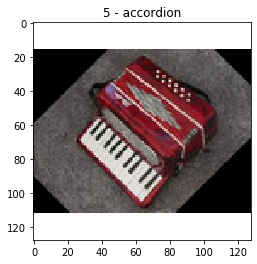

In [21]:
for imagen in range(10):
    titulo = str(processed_y[imagen]) + " - " + y_train_all[imagen]
    plot_image(x_train_all[imagen], titulo)

## 2.8. Repartir datos en valid y train

In [22]:
ramColab, GpuColab = getRam_y_Gpu(False)
if ramColab < 4:
    print("La Ram disponible no es suficiente para los entrenamientos de la red neuronal.")
else:
    getRam_y_Gpu(True)

Gen RAM Free: 16.4 GB  | Proc size: 14.6 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [23]:
print(X_train.shape, y_train.shape)

(13716, 128, 128, 3) (13716, 102)


In [24]:
train_X, valid_X, train_label, valid_label = train_test_split(
        X_train, y_train, 
        test_size=0.2, 
        random_state=10)

print(X_train.shape, y_train.shape)
print(valid_X.shape, valid_label.shape)

(13716, 128, 128, 3) (13716, 102)
(2744, 128, 128, 3) (2744, 102)


In [25]:
ramColab, GpuColab = getRam_y_Gpu(False)
if ramColab < 4:
    print("La Ram disponible no es suficiente para los entrenamientos de la red neuronal.")
else:
    getRam_y_Gpu(True)

Gen RAM Free: 11.0 GB  | Proc size: 20.0 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


# 3. Nueva Red Neuronal

In [26]:
ramColab, GpuColab = getRam_y_Gpu(False)
if ramColab < 3:
    print("La Ram disponible no es suficiente para los entrenamientos de la red neuronal.")
else:
    getRam_y_Gpu(True)

Gen RAM Free: 11.0 GB  | Proc size: 20.0 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [0]:
nombreModeloCreado = "wisrovi-nuevoModelo"
modelExtern = ModeloExterno(nombreModelo=nombreModeloCreado, rutaBase=BASE_FOLDER)

## 3.1. Modelo Red Neuronal

In [28]:
print("********** Modelo *********")
#MaxPooling2D es una forma de reducir el número de parámetros en nuestro modelo deslizando un filtro de agrupación de 2x2 a través de la capa anterior 
#y tomando el máximo de los 4 valores en el filtro de 2x2.

new_model = Sequential()
new_model.add( Conv2D(32,  kernel_size=(3, 3), activation='relu',padding='same', input_shape=(128,128,3))  )
new_model.add( Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add(MaxPooling2D((2, 2),padding='same'))

new_model.add( Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add( Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add( Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add(MaxPooling2D((2, 2),padding='same'))

new_model.add( Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add( Conv2D(96, kernel_size=(3, 3), activation='relu', padding='same'  ) )
new_model.add(MaxPooling2D((2, 2),padding='same'))

new_model.add(Dropout(0.5)) #apagar un 50% de manera aleatoria para reducir la cantidad de parametros

new_model.add(Flatten()) #para aplanar todas las capas
new_model.add(Dense(96, activation='relu'))
new_model.add(Dropout(0.1))
new_model.add(Dense(96, activation='relu'))
new_model.add(Dense(128, activation='relu'))
new_model.add(Dropout(0.5))
new_model.add(Dense(nClasses, activation='softmax')) #Genero la capa final con la cantidad de neuronas segun la cantidad de opciones de clasificacion

new_model.summary()

new_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modelExtern.GuardarModelo(new_model)

********** Modelo *********





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64

True

## 3.2. Entrenar el modelo



Entrenamiento 1
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '





Train on 10972 samples, validate on 2744 samples
Epoch 1/11





10972/10972 [==============================] - 19s 2ms/step - loss: 4.0571 - acc: 0.1394 - val_loss: 3.5242 - val_acc: 0.2606
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 3.4788 - acc: 0.2674 - val_loss: 3.2306 - val_acc: 0.3058
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 3.2214 - acc: 0.3025 - val_loss: 2.9895 - val_acc: 0.3309
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 3.0402 - acc: 0.3257 - val_loss: 2.8899 - val_acc: 0.3528
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 2.8749 - acc: 0.3483 - val_loss: 2.7535 - val_acc: 0.3732
Epoch 6/11
10972/10972 [==============================] - 14s 1ms/step - loss: 2.7321 - acc: 0.3703 - val_loss: 2.6486 - val_acc: 0.3859
Epoch 7/11
10972/10972 [==============================] - 14s 1ms/step - loss: 2.6268 - acc: 0.3880 - val_loss: 2.5754 - 

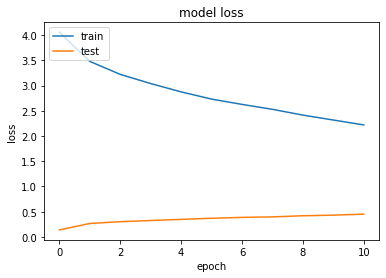

1715/1715 [==============================] - 1s 571us/step
Test loss: 2.086057446093323
Test accuracy: 0.48979591848898907
Pesos Guardados!
***************



Entrenamiento 2
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
  160/10972 [..............................] - ETA: 12s - loss: 2.0910 - acc: 0.5125

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


10972/10972 [==============================] - 14s 1ms/step - loss: 2.1510 - acc: 0.4715 - val_loss: 2.4105 - val_acc: 0.4377
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 2.0735 - acc: 0.4798 - val_loss: 2.3138 - val_acc: 0.4599
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 2.0119 - acc: 0.4917 - val_loss: 2.2590 - val_acc: 0.4672
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.9300 - acc: 0.5024 - val_loss: 2.2759 - val_acc: 0.4621
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.8548 - acc: 0.5279 - val_loss: 2.3046 - val_acc: 0.4676
Epoch 6/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.7990 - acc: 0.5356 - val_loss: 2.2526 - val_acc: 0.4701
Epoch 7/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.7253 - acc: 0.5504 - val_loss: 2.2608 - val_acc: 0.4683
Epoch 8/11
10972/10972 [============================

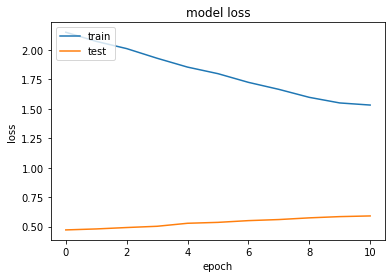

1715/1715 [==============================] - 1s 493us/step
Test loss: 1.9935902726893522
Test accuracy: 0.5457725944741474
Pesos Guardados!
***************



Entrenamiento 3
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.3338 - acc: 0.6344 - val_loss: 2.2787 - val_acc: 0.4905
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.2748 - acc: 0.6462 - val_loss: 2.3134 - val_acc: 0.4902
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.2465 - acc: 0.6552 - val_loss: 2.2846 - val_acc: 0.4945
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.2367 - acc: 0.6534 - val_loss: 2.3017 - val_acc: 0.4993
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.2019 - acc: 0.6616 - val_loss: 2.3212 - val_acc: 0.4971
Epoch 6/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1905 - acc

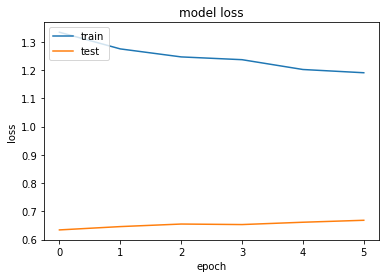

1715/1715 [==============================] - 1s 484us/step
Test loss: 1.9711132019671338
Test accuracy: 0.5632653058444098
Pesos Guardados!
***************



Entrenamiento 4
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1666 - acc: 0.6758 - val_loss: 2.3310 - val_acc: 0.5000
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1535 - acc: 0.6772 - val_loss: 2.3360 - val_acc: 0.5011
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1538 - acc: 0.6745 - val_loss: 2.3355 - val_acc: 0.5015
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1591 - acc: 0.6736 - val_loss: 2.3401 - val_acc: 0.5029
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1652 - acc: 0.6746 - val_loss: 2.3385 - val_acc: 0.5033
Epoch 6/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1477 - acc

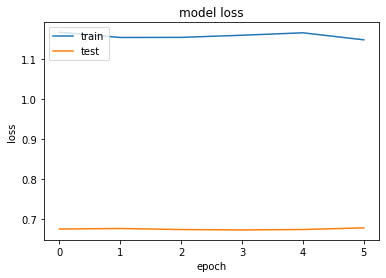

1715/1715 [==============================] - 1s 483us/step
Test loss: 1.9877162254238963
Test accuracy: 0.5609329445716591
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 5
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1478 - acc: 0.6771 - val_loss: 2.3442 - val_acc: 0.5036
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1566 - acc: 0.6826 - val_loss: 2.3450 - val_acc: 0.5040
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1509 - acc: 0.6790 - val_loss: 2.3451 - val_acc: 0.5040
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1504 - acc: 0.6801 - val_loss: 2.3449 - val_acc: 0.5033
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1436 - acc: 0.6775 - val_loss: 2.3449 - val_acc: 0.5036
Epoch 6/11
10972/10972 [=

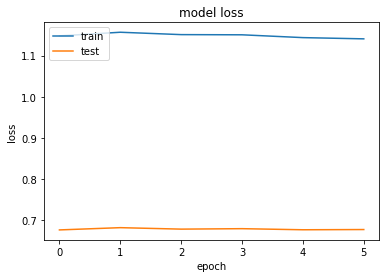

1715/1715 [==============================] - 1s 472us/step
Test loss: 1.989305611115503
Test accuracy: 0.5603498541926504
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 6
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1527 - acc: 0.6741 - val_loss: 2.3456 - val_acc: 0.5033
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1385 - acc: 0.6817 - val_loss: 2.3457 - val_acc: 0.5033
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1646 - acc: 0.6715 - val_loss: 2.3457 - val_acc: 0.5033
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1418 - acc: 0.6819 - val_loss: 2.3457 - val_acc: 0.5036
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1370 - acc: 0.6771 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 6/11
10972/10972 [==

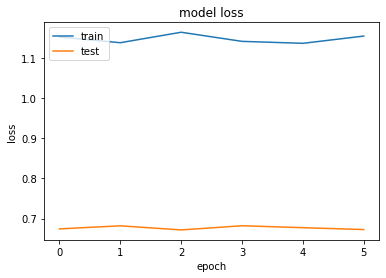

1715/1715 [==============================] - 1s 476us/step
Test loss: 1.9894152719842448
Test accuracy: 0.5603498541926504
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 7
Train on 10972 samples, validate on 2744 samples
Epoch 1/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1410 - acc: 0.6778 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 2/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1504 - acc: 0.6796 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 3/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1319 - acc: 0.6768 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 4/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1410 - acc: 0.6816 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 5/11
10972/10972 [==============================] - 14s 1ms/step - loss: 1.1325 - acc: 0.6821 - val_loss: 2.3458 - val_acc: 0.5036
Epoch 6/11
10972/10972 [=

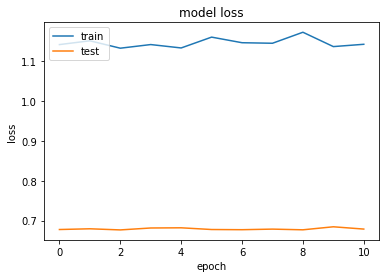

1715/1715 [==============================] - 1s 477us/step
Test loss: 1.9894181130578845
Test accuracy: 0.5603498541926504
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.


In [29]:
#Entreno el modelo
numeroEntrenamientos = 50 #Al final de cada entrenamiento guardo los mejores pesos
numeroEpocas = 11  #ciclos en los cuales evaluo los datos de entrenamiento para hallar los mejores pesos
oldModel = None
oldAccuaricy = 0
conteoFallosEncontrarUnBuenModelo = 0
for i in range(numeroEntrenamientos):     
    print()   
    print()
    print("Entrenamiento " + str(i + 1))

    history = new_model.fit(
        train_X, train_label, 
        batch_size=32, # cantidad de imágenes que se toman a la vez en memoria
        epochs=numeroEpocas, 
        verbose=1,
  
        validation_data=(valid_X, valid_label),
        callbacks=DefineCallback(nombreModeloCreado)
        )
        
    plot_history(history)
    
    test_eval = new_model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])

    if oldAccuaricy < test_eval[1]:
        #Buscamos que haya mejora en el modelo, si hay mejora, guardamos el modelo
        oldAccuaricy = test_eval[1]
        modelExtern.GuardarPesosModelo()
        oldModel = new_model
        conteoFallosEncontrarUnBuenModelo = 0
    else:
        #Buscamos que el modelo tenga mejora en por lo menos 3 intentos, si supera tres intentos de entrenamiento sin mejora, se cancela el entrenamiento
        conteoFallosEncontrarUnBuenModelo += 1
        print("No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.")
        new_model = oldModel
        if conteoFallosEncontrarUnBuenModelo > 3:
            break
    print("***************")    
    print()

In [30]:
#valido el modelo
test_eval = new_model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

1715/1715 [==============================] - 1s 483us/step
Test loss: 1.9894181130578845
Test accuracy: 0.5603498541926504


In [31]:
modelExtern.GuardarPesosModelo()

Pesos Guardados!


True

## 3.3 Cargar Modelo Red Neuronal Guardado (Nueva red neuronal desde cero)

In [32]:
modeloCargado = modelExtern.CargarModeloGuardado(False)
modeloCargado.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Lectura del Json del modelo correcta
<class 'str'>
Modelo Cargado!
Pesos Cargados!


In [33]:
print("*********************************************************************")
print("*                                                                   *")
print("*                      Modelo Creado desde cero                     *")
print("*                                                                   *")
print("*********************************************************************")
print()
print()

#valido el modelo
test_eval = modeloCargado.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

#valido el modelo 2
test_eval = modeloCargado.evaluate(X_predic, y_predic, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

#valido el modelo 3
test_eval = modeloCargado.evaluate(x_all, y_all, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

*********************************************************************
*                                                                   *
*                      Modelo Creado desde cero                     *
*                                                                   *
*********************************************************************


1715/1715 [==============================] - 1s 600us/step
Test loss: 1.9894181130578845
Test accuracy: 56.03 %

572/572 [==============================] - 0s 473us/step
Test loss: 2.135733468549235
Test accuracy: 54.72 %

9145/9145 [==============================] - 5s 516us/step
Test loss: 1.1556438886435443
Test accuracy: 73.26 %



# 4. Reentrenar un modelo de ImageNet (usando VG16)

In [34]:
ramColab, GpuColab = getRam_y_Gpu(False)
if ramColab < 3:
    print("La Ram disponible no es suficiente para los entrenamientos de la red neuronal.")
else:
    getRam_y_Gpu(True)

Gen RAM Free: 6.4 GB  | Proc size: 21.9 GB
GPU RAM Free: 16280MB | Used: 0MB | Util   0% | Total 16280MB


In [0]:
nombreModeloTransferencia = "wisrovi-transferLearning"
modeloTrasnferenciaConocimiento = ModeloExterno(nombreModelo=nombreModeloTransferencia, rutaBase=BASE_FOLDER)

## 4.1 Cargar Modelo ImageNet

In [36]:
# VGG16, VGG19, ResNet50, 
#Xception, InceptionV3, InceptionResNetV2, 
#MobileNetV2, DenseNet, RasNet


#https://www.learnopencv.com/keras-tutorial-fine-tuning-using-pre-trained-models/

from keras.applications import VGG16 
conv_base = VGG16(weights='imagenet',
                 include_top=False, # Si se deben incluir o no las capas de salida originales del modelo
                 input_shape=(128,128,3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
______________________________________________________________

## 4.2 Descongelar unas capas del Modelo ImageNet para reentrenarlas

In [37]:
congelarTodoModeloImagenet = False
if congelarTodoModeloImagenet:
  conv_base.trainable = False
else:
  # Freeze the layers except the last 4 layers
  cantidadCapasFinalesDescongelar = 5
  for layer in conv_base.layers[:-cantidadCapasFinalesDescongelar]:
      layer.trainable = False
      pass

  # Check the trainable status of the individual layers
  for layer in conv_base.layers:
      pass
      print(layer, layer.trainable)

conv_base.summary()

<keras.engine.input_layer.InputLayer object at 0x7f02f06289b0> False
<keras.layers.convolutional.Conv2D object at 0x7f02f0628550> False
<keras.layers.convolutional.Conv2D object at 0x7f02f0628da0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f02f063a550> False
<keras.layers.convolutional.Conv2D object at 0x7f030228cc18> False
<keras.layers.convolutional.Conv2D object at 0x7f02f0639eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f02f0632da0> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05cdc50> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05d64a8> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05dc208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f02f05e2cc0> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05f2b38> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05f7390> False
<keras.layers.convolutional.Conv2D object at 0x7f02f05fd208> False
<keras.layers.pooling.MaxPooling2D object at 0x7f02f0585ba8>

## 4.3. Crear nuestro modelo e incluirle el modelo de imageNet

In [38]:
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base)

pre_trained_model.add(Dropout(0.25)) #apagar un 25% de manera aleatoria para reducir la cantidad de parametros


pre_trained_model.add(
    Conv2D(32,
           kernel_size=(3, 3),
           activation='relu',
           padding='same',
           input_shape=(128,128,3)
           )
    )

pre_trained_model.add( Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'  ) )

pre_trained_model.add(Dropout(0.25)) #apagar un 25% de manera aleatoria para reducir la cantidad de parametros

#para aplanar todas las capas
#esto se hace debido a que el modelo de VG16 nos da 4 dimensiones de salida, y con esto reducimos las dimensiones a dos: numero datos, numero clases
pre_trained_model.add(Flatten()) 

# conectarlo a nueva parte densa
# Genero la capa final con la cantidad de neuronas segun la cantidad de opciones de clasificacion
pre_trained_model.add(Dense(nClasses, activation='softmax')) 

pre_trained_model.summary()

# compilar el modelo
pre_trained_model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

modeloTrasnferenciaConocimiento.GuardarModelo(pre_trained_model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 32)          147488    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
dropout_5 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 102)              

True

## 4.4. Entrenar Modelo Con conocimiento Transferido

Int:  (10972, 128, 128, 3)
Out:  (10972, 102)


Entrenamiento 1


/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 17s 2ms/step - loss: 3.3176 - acc: 0.2837 - val_loss: 2.5720 - val_acc: 0.4089
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 2.2324 - acc: 0.4545 - val_loss: 1.7811 - val_acc: 0.5481
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 1.5721 - acc: 0.5804 - val_loss: 1.4104 - val_acc: 0.6403
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 1.1915 - acc: 0.6704 - val_loss: 1.2182 - val_acc: 0.6786
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.9471 - acc: 0.7270 - val_loss: 1.0536 - val_acc: 0.7303
Epoch 6/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.7447 - acc: 0.7829 - val_loss: 1.0514 - val_acc: 0.7340
Epoch 7/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.5754 - acc: 0.8274 - val_loss: 1.0884 - val_acc:

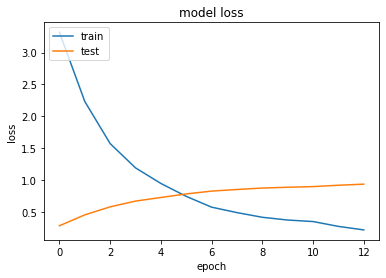

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.1741620110005748
Test accuracy: 0.7976676387967591
Pesos Guardados!
***************



Entrenamiento 2
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
  128/10972 [..............................] - ETA: 12s - loss: 0.1315 - acc: 0.9453

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


10972/10972 [==============================] - 15s 1ms/step - loss: 0.0970 - acc: 0.9725 - val_loss: 1.0109 - val_acc: 0.8141
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0552 - acc: 0.9839 - val_loss: 1.0225 - val_acc: 0.8163
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0390 - acc: 0.9900 - val_loss: 1.0178 - val_acc: 0.8203
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0325 - acc: 0.9939 - val_loss: 1.0389 - val_acc: 0.8218
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0256 - acc: 0.9938 - val_loss: 1.0433 - val_acc: 0.8236
Epoch 6/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0237 - acc: 0.9954 - val_loss: 1.0807 - val_acc: 0.8222
dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


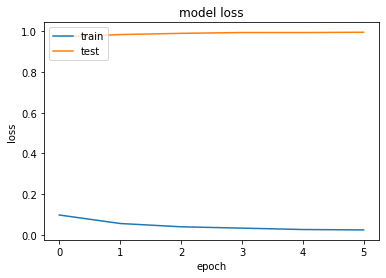

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2603732952918674
Test accuracy: 0.8233236152298596
Pesos Guardados!
***************



Entrenamiento 3
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0207 - acc: 0.9959 - val_loss: 1.0773 - val_acc: 0.8240
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0199 - acc: 0.9951 - val_loss: 1.0754 - val_acc: 0.8222
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0193 - acc: 0.9964 - val_loss: 1.0737 - val_acc: 0.8240
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0200 - acc: 0.9957 - val_loss: 1.0679 - val_acc: 0.8222
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0163 - acc: 0.9974 - val_loss: 1.0691 - val_acc: 0.8251
Epoch 6/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0167 - acc: 

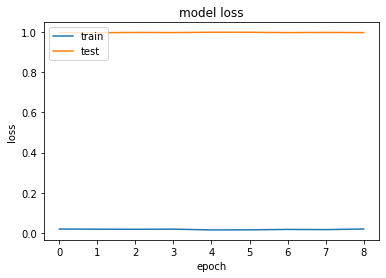

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2666479336277041
Test accuracy: 0.8244897959878771
Pesos Guardados!
***************



Entrenamiento 4
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0170 - acc: 0.9974 - val_loss: 1.0801 - val_acc: 0.8247
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0150 - acc: 0.9974 - val_loss: 1.0811 - val_acc: 0.8251
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0156 - acc: 0.9981 - val_loss: 1.0819 - val_acc: 0.8247
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0151 - acc: 0.9976 - val_loss: 1.0823 - val_acc: 0.8243
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0188 - acc: 0.9963 - val_loss: 1.0821 - val_acc: 0.8247
Epoch 6/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0167 - acc: 

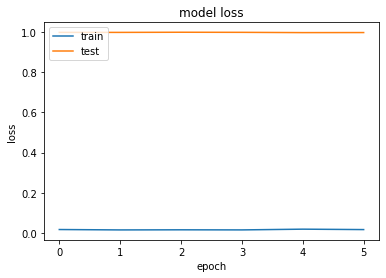

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2705446516459606
Test accuracy: 0.8250728863668859
Pesos Guardados!
***************



Entrenamiento 5
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0165 - acc: 0.9972 - val_loss: 1.0818 - val_acc: 0.8251
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0176 - acc: 0.9969 - val_loss: 1.0818 - val_acc: 0.8251
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0198 - acc: 0.9958 - val_loss: 1.0818 - val_acc: 0.8251
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0175 - acc: 0.9960 - val_loss: 1.0818 - val_acc: 0.8251
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0171 - acc: 0.9964 - val_loss: 1.0818 - val_acc: 0.8251
Epoch 6/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0175 - acc: 

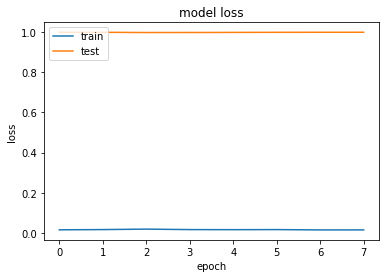

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2709458892616516
Test accuracy: 0.8244897959878771
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 6
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0178 - acc: 0.9962 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0163 - acc: 0.9975 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0189 - acc: 0.9958 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0166 - acc: 0.9969 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0185 - acc: 0.9960 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 6/15
10972/10972 [===

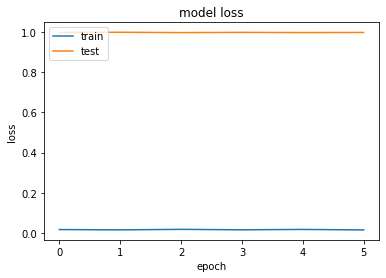

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2709735938480922
Test accuracy: 0.8244897959878771
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 7
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0167 - acc: 0.9969 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0176 - acc: 0.9970 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0172 - acc: 0.9966 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0171 - acc: 0.9968 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0162 - acc: 0.9971 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 6/15
10972/10972 [===

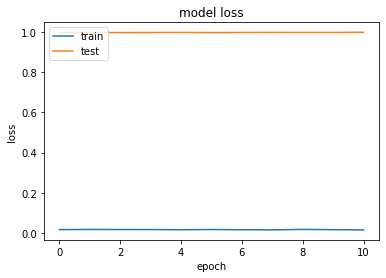

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2709728165548675
Test accuracy: 0.8244897959878771
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.
***************



Entrenamiento 8
Train on 10972 samples, validate on 2744 samples
Epoch 1/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0156 - acc: 0.9972 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 2/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0163 - acc: 0.9966 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 3/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0167 - acc: 0.9968 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 4/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0159 - acc: 0.9969 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 5/15
10972/10972 [==============================] - 15s 1ms/step - loss: 0.0158 - acc: 0.9968 - val_loss: 1.0819 - val_acc: 0.8254
Epoch 6/15
10972/10972 [===

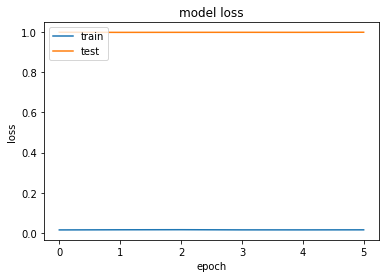

1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.270972716147976
Test accuracy: 0.8244897959878771
No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.


In [39]:
#Entreno el modelo

#Al final de cada entrenamiento guardo los mejores pesos
numeroEntrenamientos = 30

#ciclos en los cuales evaluo los datos de entrenamiento para hallar los mejores pesos
numeroEpocas = 15

#ver datos entrenamiento
print("Int: ", train_X.shape)
print("Out: ", train_label.shape)

oldModel = None
oldAccuaricy = 0
conteoFallosEncontrarUnBuenModelo = 0
for i in range(numeroEntrenamientos):     
    print()   
    print()
    print("Entrenamiento " + str(i + 1))

    history = pre_trained_model.fit(
        train_X, train_label, 
        batch_size=64, # cantidad de imágenes que se toman a la vez en memoria
        epochs=numeroEpocas,        
        verbose=1,
        validation_data=(valid_X, valid_label),
        callbacks=DefineCallback(nombreModeloTransferencia)
        )
        
    plot_history(history)   

    test_eval = pre_trained_model.evaluate(X_test, y_test, verbose=1)
    print('Test loss:', test_eval[0])
    print('Test accuracy:', test_eval[1])

    if oldAccuaricy < test_eval[1]:
        #Buscamos que haya mejora en el modelo, si hay mejora, guardamos el modelo
        oldAccuaricy = test_eval[1]
        modeloTrasnferenciaConocimiento.GuardarPesosModelo()
        oldModel = pre_trained_model
        conteoFallosEncontrarUnBuenModelo = 0
    else:
        #Buscamos que el modelo tenga mejora en por lo menos 3 intentos, si supera tres intentos de entrenamiento sin mejora, se cancela el entrenamiento
        conteoFallosEncontrarUnBuenModelo += 1
        pre_trained_model = oldModel
        print("No se ha encontrado mejora al modelo, por lo cual se conservan el modelo anterior.")
        if conteoFallosEncontrarUnBuenModelo > 3:
            break
    print("***************")    
    print()

## 4.5. Cargar Modelo Red Neuronal Guardado (Transferencia conocimiento)

In [40]:
modeloCargadoTransferenciaConocimiento = modeloTrasnferenciaConocimiento.CargarModeloGuardado(False)
modeloCargadoTransferenciaConocimiento.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Lectura del Json del modelo correcta
<class 'str'>
Modelo Cargado!
Pesos Cargados!


In [41]:
print("*********************************************************************")
print("*                                                                   *")
print("*           Modelo basado en transferencia de conocimiento          *")
print("*                                                                   *")
print("*********************************************************************")
print()
print()

#valido el modelo
test_eval = modeloCargadoTransferenciaConocimiento.evaluate(X_test, y_test, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

#valido el modelo 2
test_eval = modeloCargadoTransferenciaConocimiento.evaluate(X_predic, y_predic, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

#valido el modelo 3
test_eval = modeloCargadoTransferenciaConocimiento.evaluate(x_all, y_all, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy: %s %%' %( round(test_eval[1]*100, 2)))
print()

*********************************************************************
*                                                                   *
*           Modelo basado en transferencia de conocimiento          *
*                                                                   *
*********************************************************************


1715/1715 [==============================] - 2s 1ms/step
Test loss: 1.2705446516459606
Test accuracy: 82.51 %

572/572 [==============================] - 1s 1ms/step
Test loss: 1.4085380222413924
Test accuracy: 81.99 %

9145/9145 [==============================] - 10s 1ms/step
Test loss: 0.458480482917035
Test accuracy: 93.56 %



# 5. Conclusiones

Al usar la transferencia de conocimiento es más facil alcanzar un modelo de clasificacion óptimo para el objetivo propuesto en pocas epocas de reentrenamiento

Al implementar un aumento de dataset con imageDataGenerator los modelos se entrenan con datos mas generales y esto logra que el modelo sea mas eficiente al predecir datos que no se mostraron durante el entrenamiento